<a href="https://colab.research.google.com/github/jessicabellas/Test-challenge/blob/master/data_intern_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Intern Challenge

This is Conta Stone's data challenge for intern applicants. The objective is to extract and analyze data from a database.


##Instructions

The solution can be developed using Python, SQL scripts, a BI tool or a combination of those. It must be sent as a compressed .zip folder including all the necessary files or hosted in a public code repository, such as GitHub or GitLab.

Access the PostgreSQL database using the following credentials:

    host: db-stone.cjepwwjnksng.us-east-1.rds.amazonaws.com
    port: 5432
    database name: postgres
    user: read_only_user
    password: banking123

The database contains credit card transactional data in 4 tables:

    - customers
    - cards
    - transactions
    - frauds

1. Extract and analyze the data in the database in order to answer the following questions. Provide a description and/or comments for each solution.


    1.1 - What is the average age of the customers in the database?
    1.2 - How is the card_family ranked based on the credit_limit given to each card?
    1.3 - For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

2. Analysis:

    Analyze whether or not the fraudulent transactions are somehow associated to the other features of the dataset. Explain your results.

###The first step is to import some libraries.

In [170]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import psycopg2 
import matplotlib.pyplot as plt


###Second step is the connection with the database.

In [171]:
con = psycopg2.connect(
    
    host = 'db-stone.cjepwwjnksng.us-east-1.rds.amazonaws.com',
    port = '5432',
    database =  'postgres',
    user= 'read_only_user',
    password= 'banking123'
    
)

Now, I'm going to get all the tables in the database.

In [172]:
customers = pd.read_sql('SELECT * FROM customers', con)
cards = pd.read_sql('SELECT * FROM cards', con)
transactions = pd.read_sql('SELECT * FROM transactions', con)
frauds = pd.read_sql('SELECT * FROM frauds', con)


In [173]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5674 non-null   object
 1   age            5674 non-null   int64 
 2   segment        5674 non-null   object
 3   vintage_group  5674 non-null   object
dtypes: int64(1), object(3)
memory usage: 177.4+ KB


In [ ]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   card_number   500 non-null    object
 1   card_family   500 non-null    object
 2   credit_limit  500 non-null    int64 
 3   customer_id   500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  object
 1   card_number       10000 non-null  object
 2   transaction_date  10000 non-null  object
 3   value             10000 non-null  int64 
 4   segment           10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [ ]:
frauds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  109 non-null    object
 1   fraud_flag      109 non-null    bool  
dtypes: bool(1), object(1)
memory usage: 1.1+ KB


### **Question 1.1** - What is the average age of the customers in the database?

In [ ]:
customers.head()

,id,age,segment,vintage_group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1


In [ ]:
avg_age = pd.read_sql('SELECT AVG(age) FROM CUSTOMERS', con)
print(avg_age)

         avg
0  35.059922


In [ ]:
#Double check 
customers.age.describe()

count    5674.000000
mean       35.059922
std         8.962637
min        20.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        50.000000
Name: age, dtype: float64

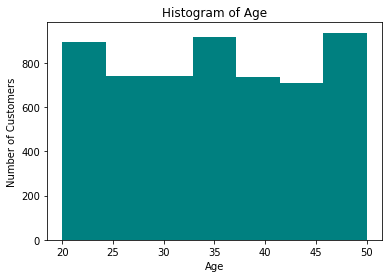

In [ ]:
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.hist(customers['age'].values, label='Premium', color='teal', bins=7)
plt.show()

###**Answer 1.1:**

###*The average age of the customers in the database is 35 years old.*

### **Question 1.2** - How is the card_family ranked based on the credit_limit given to each card?

In [ ]:
cards.head(10)

,card_number,card_family,credit_limit,customer_id
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518
5,2764-7023-8396-5255,Gold,50000,CC49168
6,4864-7119-5608-7611,Premium,781000,CC66746
7,5160-8427-6529-3274,Premium,490000,CC28930
8,6691-5105-1556-4131,Premium,640000,CC76766
9,1481-2536-2178-7547,Premium,653000,CC18007


In [ ]:
cards[['card_family','credit_limit']].groupby('card_family').describe()

credit_limit                 ...                    
                   count           mean  ...       75%       max
card_family                              ...                    
Gold               181.0   27878.453039  ...   38000.0   50000.0
Platinum           112.0  131294.642857  ...  166250.0  200000.0
Premium            207.0  514763.285024  ...  710000.0  899000.0

[3 rows x 8 columns]

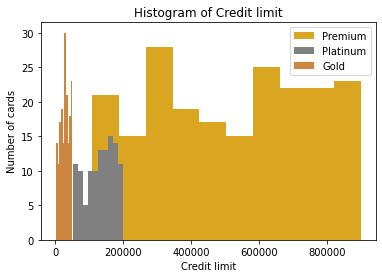

In [ ]:
plt.title('Histogram of Credit limit')
plt.xlabel('Credit limit')
plt.ylabel('Number of cards')
plt.hist(cards[cards.card_family == 'Premium']['credit_limit'].values, label='Premium', color='goldenrod')
plt.hist(cards[cards.card_family == 'Platinum']['credit_limit'].values, label='Platinum', color='gray')
plt.hist(cards[cards.card_family == 'Gold']['credit_limit'].values, label='Gold', color='peru')
plt.legend()
plt.show()

###**Answer 1.2**:

###The ranking of th card_family based on the credit_limit is Gold - Platinum - Premium in ascending order.

###**Question 1.3:** 
### - For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

In [ ]:
frauds.head()

,transaction_id,fraud_flag
0,CTID50558449,True
1,CTID55936882,True
2,CTID63762180,True
3,CTID76723439,True
4,CTID21246201,True


In [ ]:
transactions.head()

,id,card_number,transaction_date,value,segment
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14


For this question, I'll need to join two tables, they are transaction and frauds.

In [174]:
transactions_frauds = frauds.merge(transactions, right_on='id', left_on='transaction_id')
transactions_frauds.head()

,transaction_id,fraud_flag,id,card_number,transaction_date,value,segment
0,CTID50558449,True,CTID50558449,4246-1369-3659-8804,2016-05-06,6984,SEG23
1,CTID55936882,True,CTID55936882,1336-9200-1264-2551,2016-11-29,34367,SEG21
2,CTID63762180,True,CTID63762180,8528-6154-7390-5081,2016-12-05,44550,SEG15
3,CTID76723439,True,CTID76723439,7908-2695-7391-7499,2016-09-15,48275,SEG16
4,CTID21246201,True,CTID21246201,2524-4184-5908-6750,2016-02-29,35751,SEG25


In [175]:
highest_fraud = transactions_frauds[transactions_frauds.value == transactions_frauds.value.max()]
highest_fraud

,transaction_id,fraud_flag,id,card_number,transaction_date,value,segment
6,CTID20567160,True,CTID20567160,3295-6390-4452-7199,2016-10-08,49155,SEG16


As the usual, a double check. 

In [176]:
highest_value = pd.read_sql('select * from frauds left join transactions on transactions.id= frauds.transaction_id order by transactions.value desc', con)
highest_value.head()

,transaction_id,fraud_flag,id,card_number,transaction_date,value,segment
0,CTID20567160,True,CTID20567160,3295-6390-4452-7199,2016-10-08,49155,SEG16
1,CTID15034243,True,CTID15034243,4562-2665-7578-1931,2016-02-14,48845,SEG19
2,CTID95884307,True,CTID95884307,2017-7197-7814-9950,2016-11-07,48588,SEG16
3,CTID54759604,True,CTID54759604,8262-8743-6406-7105,2016-09-07,48567,SEG20
4,CTID55429304,True,CTID55429304,9030-1667-6058-6173,2016-03-03,48514,SEG15


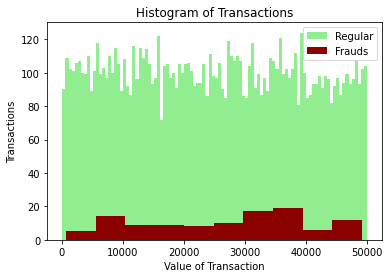

In [177]:
plt.title('Histogram of Transactions')
plt.xlabel('Value of Transaction')
plt.ylabel('Transactions')
plt.hist(transactions['value'].values, label='Regular', color='lightgreen', bins=100)
plt.hist(transactions_frauds[transactions_frauds.fraud_flag == True]['value'].values, label='Frauds', color='darkred')

plt.legend()
plt.show()

###**Answer 1.3**:

###The Id with the highest transaction value is CTID20567160. 

In [178]:
#closing the connection with the database
con.close()

###**Question 2:**
###Analyze whether or not the fraudulent transactions are somehow associated to the other features of the dataset. Explain your results.


For analyze the fraudulent transactions I'll need to join all the tables.

In [198]:
df_transactions = pd.merge(transactions, frauds, left_on='id', right_on='transaction_id', how='left')
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10000 non-null  object
 1   card_number       10000 non-null  object
 2   transaction_date  10000 non-null  object
 3   value             10000 non-null  int64 
 4   segment           10000 non-null  object
 5   transaction_id    109 non-null    object
 6   fraud_flag        109 non-null    object
dtypes: int64(1), object(6)
memory usage: 625.0+ KB


In [199]:
df_transactions2 = pd.merge(customers, cards, left_on='id', right_on='customer_id', how='inner')
df_transactions2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             500 non-null    object
 1   age            500 non-null    int64 
 2   segment        500 non-null    object
 3   vintage_group  500 non-null    object
 4   card_number    500 non-null    object
 5   card_family    500 non-null    object
 6   credit_limit   500 non-null    int64 
 7   customer_id    500 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB


In [200]:
dataset_transactions = pd.merge(df_transactions, df_transactions2, left_on='card_number', right_on='card_number', how='left')
dataset_transactions.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_x              10000 non-null  object
 1   card_number       10000 non-null  object
 2   transaction_date  10000 non-null  object
 3   value             10000 non-null  int64 
 4   segment_x         10000 non-null  object
 5   transaction_id    109 non-null    object
 6   fraud_flag        109 non-null    object
 7   id_y              10000 non-null  object
 8   age               10000 non-null  int64 
 9   segment_y         10000 non-null  object
 10  vintage_group     10000 non-null  object
 11  card_family       10000 non-null  object
 12  credit_limit      10000 non-null  int64 
 13  customer_id       10000 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.1+ MB



I will exclude the columns that will not be used to analyze the data.

In [201]:
dataset_transactions = dataset_transactions.drop(columns=['id_x', 'id_y', 'card_number', 'transaction_id', 'customer_id'])

In [202]:
dataset_transactions.head()

,transaction_date,value,segment_x,fraud_flag,age,segment_y,vintage_group,card_family,credit_limit
0,2016-04-24,23649,SEG25,NaN,23,Gold,VG3,Platinum,194000
1,2016-02-11,26726,SEG16,NaN,48,Gold,VG3,Gold,15000
2,2016-11-01,22012,SEG14,NaN,23,Diamond,VG1,Gold,2000
3,2016-01-28,37637,SEG17,NaN,44,Platinum,VG2,Gold,19000
4,2016-03-17,5113,SEG14,NaN,42,Gold,VG3,Premium,417000



After that I will check if we have missing data.

In [203]:
dataset_transactions.isnull().sum()

transaction_date       0
value                  0
segment_x              0
fraud_flag          9891
age                    0
segment_y              0
vintage_group          0
card_family            0
credit_limit           0
dtype: int64

I will to fill False to the 'NaN' as a non-fraudulent transaction and True for the anothers rows.

In [204]:
dataset_transactions['fraud_flag'].fillna(False , inplace=True)

In [205]:
dataset_transactions.isnull().sum()

transaction_date    0
value               0
segment_x           0
fraud_flag          0
age                 0
segment_y           0
vintage_group       0
card_family         0
credit_limit        0
dtype: int64

I observed in the database and also when I did a first analysis with pandas profiling that the atributtes segment and vintage_group are hight equivalente in the dataset. For that I will check the equivalence.

In [206]:
dataset_transactions['segment_y'].value_counts()


Diamond     4460
Gold        3252
Platinum    2288
Name: segment_y, dtype: int64

In [207]:
dataset_transactions['vintage_group'].value_counts()

VG1    4460
VG3    3252
VG2    2288
Name: vintage_group, dtype: int64

In [208]:
dataset_transactions.groupby('segment_y').vintage_group.describe()

,count,unique,top,freq
segment_y,,,,
Diamond,4460,1,VG1,4460
Gold,3252,1,VG3,3252
Platinum,2288,1,VG2,2288


The atributtes segment and vintage_group are equivalente in the dataset. For this reason I will delete it from my dataset

In [209]:
dataset_transactions = dataset_transactions.drop(columns=['vintage_group'])

In [210]:
dataset_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_date  10000 non-null  object
 1   value             10000 non-null  int64 
 2   segment_x         10000 non-null  object
 3   fraud_flag        10000 non-null  bool  
 4   age               10000 non-null  int64 
 5   segment_y         10000 non-null  object
 6   card_family       10000 non-null  object
 7   credit_limit      10000 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 634.8+ KB


For a better comprehension of my dataset, I will rename the segments columns. 

In [211]:
dataset_transactions = dataset_transactions.rename(index=str, columns={'segment_y':'customer_seg'})
dataset_transactions = dataset_transactions.rename(index=str, columns={'segment_x':'segment'})

Now I’ll take the day and month of transactions for the transactions_date attribute.

In [212]:
dataset_transactions['day'] = dataset_transactions.transaction_date.apply(lambda date: date.day)
dataset_transactions['month'] = dataset_transactions.transaction_date.apply(lambda date: date.month)

In [213]:
dataset_transactions = dataset_transactions.drop(columns=['transaction_date'])

In [214]:
dataset_transactions.head()


,value,segment,fraud_flag,age,customer_seg,card_family,credit_limit,day,month
0,23649,SEG25,False,23,Gold,Platinum,194000,24,4
1,26726,SEG16,False,48,Gold,Gold,15000,11,2
2,22012,SEG14,False,23,Diamond,Gold,2000,1,11
3,37637,SEG17,False,44,Platinum,Gold,19000,28,1
4,5113,SEG14,False,42,Gold,Premium,417000,17,3


Let's analyze each column with the column fraud_flag.

### Segment

In [216]:
seg = dataset_transactions
seg = seg.drop(columns=['credit_limit', 'value', 'age', 'customer_seg', 'card_family', 'credit_limit', 'day','month'])

In [267]:
seg[seg.fraud_flag == True].groupby('segment').count()

,fraud_flag
segment,
SEG11,15
SEG12,6
SEG13,4
SEG14,6
SEG15,6
SEG16,8
SEG17,8
SEG18,4
SEG19,3


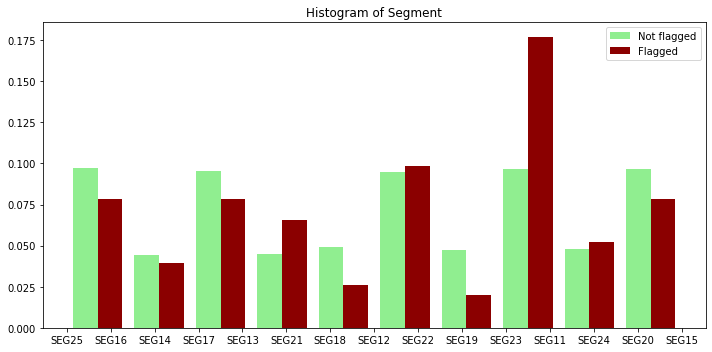

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['segment'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['segment']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of Segment') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that segments 11 and 22 have a higher percentage of fraudulent transactions than non-fraudulent ones.
In turn, segments 19 and 12 have a lower percentage of fraudulent transactions than non-fraudulent ones.

### Customer_Segment

In [220]:
customer_seg_fraud_flag = dataset_transactions
customer_seg_fraud_flag = customer_seg_fraud_flag.drop(columns=['credit_limit', 'day','month', 'value', 'age', 'segment', 'card_family', 'credit_limit'])

In [221]:
customer_seg_fraud_flag[customer_seg_fraud_flag.fraud_flag == True].groupby('customer_seg').describe()

fraud_flag                  
                  count unique   top freq
customer_seg                             
Diamond              54      1  True   54
Gold                 27      1  True   27
Platinum             28      1  True   28

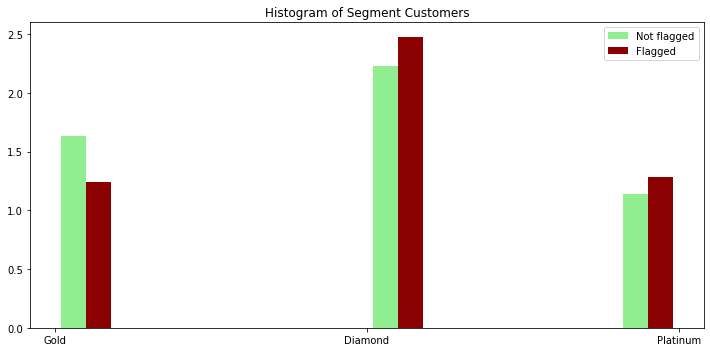

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['customer_seg'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['customer_seg']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of Segment Customers') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that the customer_segment Diamond and platinum have a higher percentage of fraudulent transactions than non-fraudulent ones. In turn, customer_segment Gold has a lower percentage of fraudulent transactions compared to non-fraudulent ones.


### Card_family

In [229]:
card_family_fraud_flag = dataset_transactions
card_family_fraud_flag = card_family_fraud_flag.drop(columns=['age', 'value', 'segment', 'customer_seg', 
                                                              'credit_limit', 'day', 'month'])
card_family_fraud_flag[card_family_fraud_flag.fraud_flag == True].groupby('card_family').describe()

fraud_flag                  
                 count unique   top freq
card_family                             
Gold                39      1  True   39
Platinum            25      1  True   25
Premium             45      1  True   45

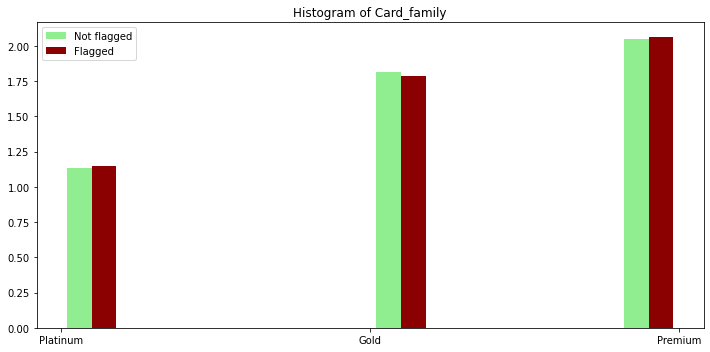

In [230]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['card_family'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['card_family']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of Card_family') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that card_family has a very close percentage of fraudulent transactions and non-fraudulent transactions.

### Age

In [232]:
age_fraud_flag = dataset_transactions
age_fraud_flag = age_fraud_flag.drop(columns=['credit_limit', 'value', 'segment', 'customer_seg', 'card_family', 
                                               'day', 'month'])
age_fraud_flag[age_fraud_flag.fraud_flag == True].groupby('age').describe()

fraud_flag                  
         count unique   top freq
age                             
20           2      1  True    2
21           1      1  True    1
22           5      1  True    5
23           4      1  True    4
24           5      1  True    5
25           2      1  True    2
26           3      1  True    3
27           3      1  True    3
28           1      1  True    1
29           5      1  True    5
30           7      1  True    7
31           4      1  True    4
32           5      1  True    5
33           4      1  True    4
34           2      1  True    2
35           4      1  True    4
36           3      1  True    3
37           3      1  True    3
38           3      1  True    3
39           5      1  True    5
40           2      1  True    2
41           8      1  True    8
42           8      1  True    8
43           2      1  True    2
44           1      1  True    1
45           1      1  True    1
46           2      1  True    2
47           2      1  True    2
48           6      1  True    6
49           2      1  True    2
50           4      1  True    4

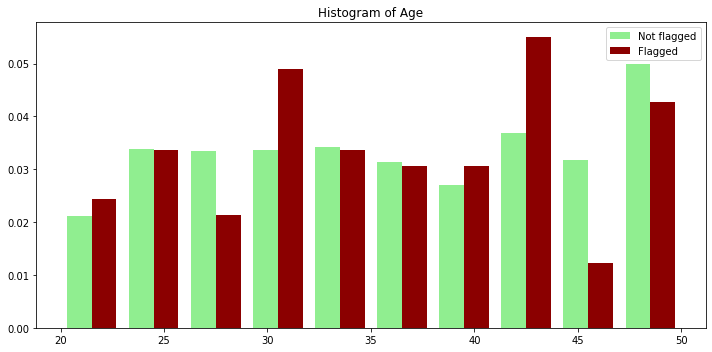

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['age'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['age']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of Age') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that ages 30, 31 and 32 as well as 42 and 43 have a higher percentage of fraudulent transactions compared to non-fraudulent ones. In turn, ages 26 and 27, as well as 45 and 46, have a lower percentage of fraudulent transactions compared to non-fraudulent ones.

### Credit_Limit

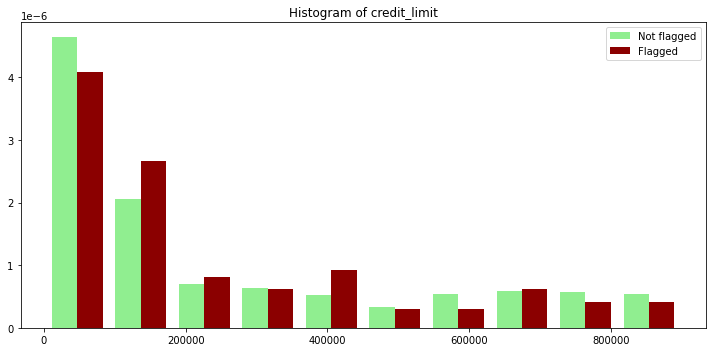

In [237]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['credit_limit'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['credit_limit']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of credit_limit') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that the credit limits of 150000 and 400000 have a higher percentage of fraudulent transactions compared to non-fraudulent ones. In turn, the credit limit below 150000 and 600000 has a lower percentage of fraudulent transactions compared to non-fraudulent ones.

### Value

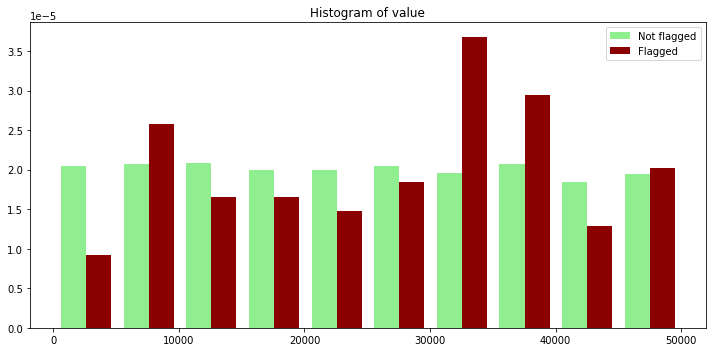

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['value'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['value']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of value') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that the values: 9000, between 30000 and 40000, and 48000 have a higher percentage of fraudulent transactions compared to non-fraudulent ones. In turn, all other amounts have a lower percentage of fraudulent transactions compared to non-fraudulent ones.

### Day

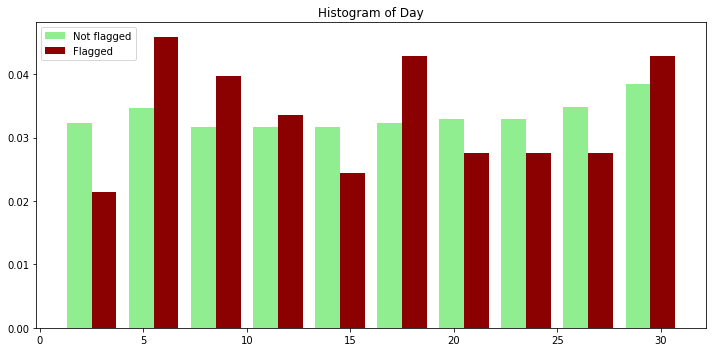

In [257]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['day'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['day']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of Day') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that days 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 29 and 30 have a higher percentage of fraudulent transactions compared to non-fraudulent ones. In turn, every other day has a lower percentage of fraudulent transactions compared to non-fraudulent ones.

### Month

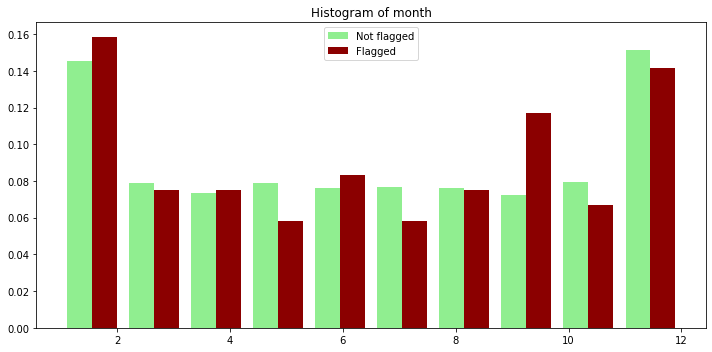

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['month'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['month']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of month') 

plt.legend() 
plt.tight_layout() 
plt.show()

The graph shows that months 1, 4, 6 and 9 have a higher percentage of fraudulent transactions compared to non-fraudulent ones. In turn, all other months have a lower percentage of fraudulent transactions compared to non-fraudulent ones.

### Experiment

In [259]:
dataset_transactions.columns


Index(['value', 'segment', 'fraud_flag', 'age', 'customer_seg', 'card_family',
       'credit_limit', 'day', 'month'],
      dtype='object')

In [273]:
dataset_transactions['Limit_percent_value'] = (dataset_transactions.value / dataset_transactions.credit_limit)*100
dataset_transactions.head(10)

,value,segment,fraud_flag,age,customer_seg,card_family,credit_limit,day,month,Limit_percent_value
0,23649,SEG25,False,23,Gold,Platinum,194000,24,4,12.190206
1,26726,SEG16,False,48,Gold,Gold,15000,11,2,178.173333
2,22012,SEG14,False,23,Diamond,Gold,2000,1,11,1100.600000
3,37637,SEG17,False,44,Platinum,Gold,19000,28,1,198.089474
4,5113,SEG14,False,42,Gold,Premium,417000,17,3,1.226139
5,9551,SEG13,False,27,Platinum,Platinum,192000,15,5,4.974479
6,29511,SEG13,False,44,Diamond,Gold,31000,11,7,95.196774
7,27830,SEG21,False,35,Diamond,Premium,492000,26,7,5.656504
8,35328,SEG18,False,38,Diamond,Premium,782000,16,1,4.517647
9,9567,SEG21,False,31,Platinum,Platinum,162000,6,11,5.905556


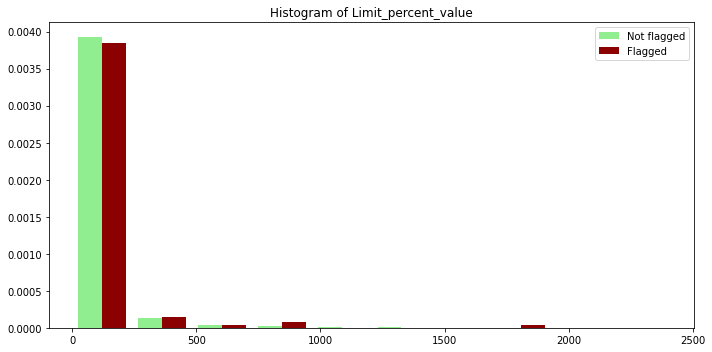

In [263]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

colors = [ 'lightgreen', 'darkred']
labels = ['Not flagged', 'Flagged']

plt.hist([dataset_transactions[dataset_transactions.fraud_flag == False]['Limit_percent_value'], 
          dataset_transactions[dataset_transactions.fraud_flag == True]['Limit_percent_value']], 
          density=True, label=labels, color=colors)

plt.title('Histogram of Limit_percent_value') 

plt.legend() 
plt.tight_layout() 
plt.show()

I tried an experiment feature, I divided the transaction amount by the card limit. 
The graph shows that in most transactions the amounts are less than or equal to the credit limit. We also realized that the value of some transactions far exceeds the value of the available credit limit. However, I didn't notice almost any variation between the percentage of valid transactions and fraudulent transactions.

### Conclusion:

In this dataset it was possible to see that some attributes have a higher percentage of fraudulent than non-fradulent.
The greater the difference, the greater the possibility of fraud.

Among the attributes analyzed, these stood out with the great possibility of a fradulent transaction: segment 11, Diamond, ages 30 and 42, credit_limit of 150,000 and 400,000, transaction values ​​between 30,000 and 40,000 and transactions in the month 9.

It was not possible to visualize the relationship between the attributes of the correlation matrix analysis.
I believe that with more data and the dataset balanced, it would be possible to obtain better results.


